In [34]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from scipy.integrate import odeint, solve_ivp
from scipy.optimize import minimize
from scipy.stats import linregress, spearmanr, norm

from gLV_fit_lambda import *

import warnings

In [35]:
warnings.filterwarnings('ignore')

# INULINA

## Start by importing full dataset

In [36]:
dataset_inulin = "Inulin"
df_inulin = pd.read_csv(f"Data_Params/{dataset_inulin}_full.csv")
print(df_inulin.shape)
df_inulin.head()

(413, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC,0.0,0.000497,0.011394,0.007156,0.020968,0.002733,0.033991,0.002984,0.000497,0.000494,0.003338
1,COMM10<AC,24.0,0.004222,0.207472,0.191100,0.469179,0.064864,0.730442,0.058850,0.046688,0.006322,0.069095
2,COMM10<BH,0.0,0.000227,0.004001,0.006821,0.023491,0.002305,0.038726,0.004379,0.000728,0.000365,0.006409
3,COMM10<BH,24.0,0.002334,0.069855,0.206212,0.498160,0.047937,0.809264,0.067727,0.084315,0.005259,0.115585
4,COMM10<BP,0.0,0.000214,0.004692,0.005192,0.019954,0.003273,0.041992,0.000738,0.001651,0.000340,0.004721


## Initialize model parameters (all zeros except self-interaction terms=-1)

In [37]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1


Model has 110 parameters


## Run optimization to find regularized parameters

In [38]:
# instantiate gLV fit 
gLV_model_inulin = ODE(df_inulin, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model_inulin.fit()
# print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


100%|██████████| 85/85 [00:00<00:00, 406.37it/s]


Iteration: 0, Loss: 6.170e+02, Convergence rate: inf
Iteration: 1, Loss: 6.083e+02, Convergence rate: 1.411e-02
Iteration: 2, Loss: 5.997e+02, Convergence rate: 1.411e-02
Iteration: 3, Loss: 5.912e+02, Convergence rate: 1.413e-02
Iteration: 4, Loss: 5.829e+02, Convergence rate: 1.412e-02
Iteration: 5, Loss: 5.746e+02, Convergence rate: 1.411e-02
Iteration: 6, Loss: 5.666e+02, Convergence rate: 1.409e-02
Iteration: 7, Loss: 5.586e+02, Convergence rate: 1.406e-02
Iteration: 8, Loss: 5.507e+02, Convergence rate: 1.404e-02
Iteration: 9, Loss: 5.430e+02, Convergence rate: 1.401e-02
Iteration: 10, Loss: 5.355e+02, Convergence rate: 1.395e-02
Iteration: 11, Loss: 5.280e+02, Convergence rate: 1.392e-02
Iteration: 12, Loss: 5.207e+02, Convergence rate: 1.386e-02
Iteration: 13, Loss: 5.135e+02, Convergence rate: 1.384e-02
Iteration: 14, Loss: 5.064e+02, Convergence rate: 1.377e-02
Iteration: 15, Loss: 4.994e+02, Convergence rate: 1.372e-02
Iteration: 16, Loss: 4.926e+02, Convergence rate: 1.367e

100%|██████████| 85/85 [00:00<00:00, 94.57it/s] 


Total samples: 1234, Updated regularization: 1.37e-01
Iteration: 0, Loss: 5.033e+02, Convergence rate: inf
Iteration: 1, Loss: 5.010e+02, Convergence rate: 4.558e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 4.965e+02, Convergence rate: 8.936e-03
Step size set to 4.000e-02
Evidence 20732.368
Updating precision...


100%|██████████| 85/85 [00:00<00:00, 105.36it/s]


Total samples: 1234, Updated regularization: 2.25e-01
Iteration: 0, Loss: 5.984e+02, Convergence rate: inf
Iteration: 1, Loss: 5.960e+02, Convergence rate: 4.050e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 5.912e+02, Convergence rate: 8.046e-03
Step size set to 4.000e-02
Evidence 21675.353
Updating precision...


100%|██████████| 85/85 [00:00<00:00, 124.17it/s]


Total samples: 1234, Updated regularization: 2.51e-01
Iteration: 0, Loss: 6.135e+02, Convergence rate: inf
Iteration: 1, Loss: 6.112e+02, Convergence rate: 3.807e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 6.065e+02, Convergence rate: 7.569e-03
Step size set to 4.000e-02
Evidence 21852.765


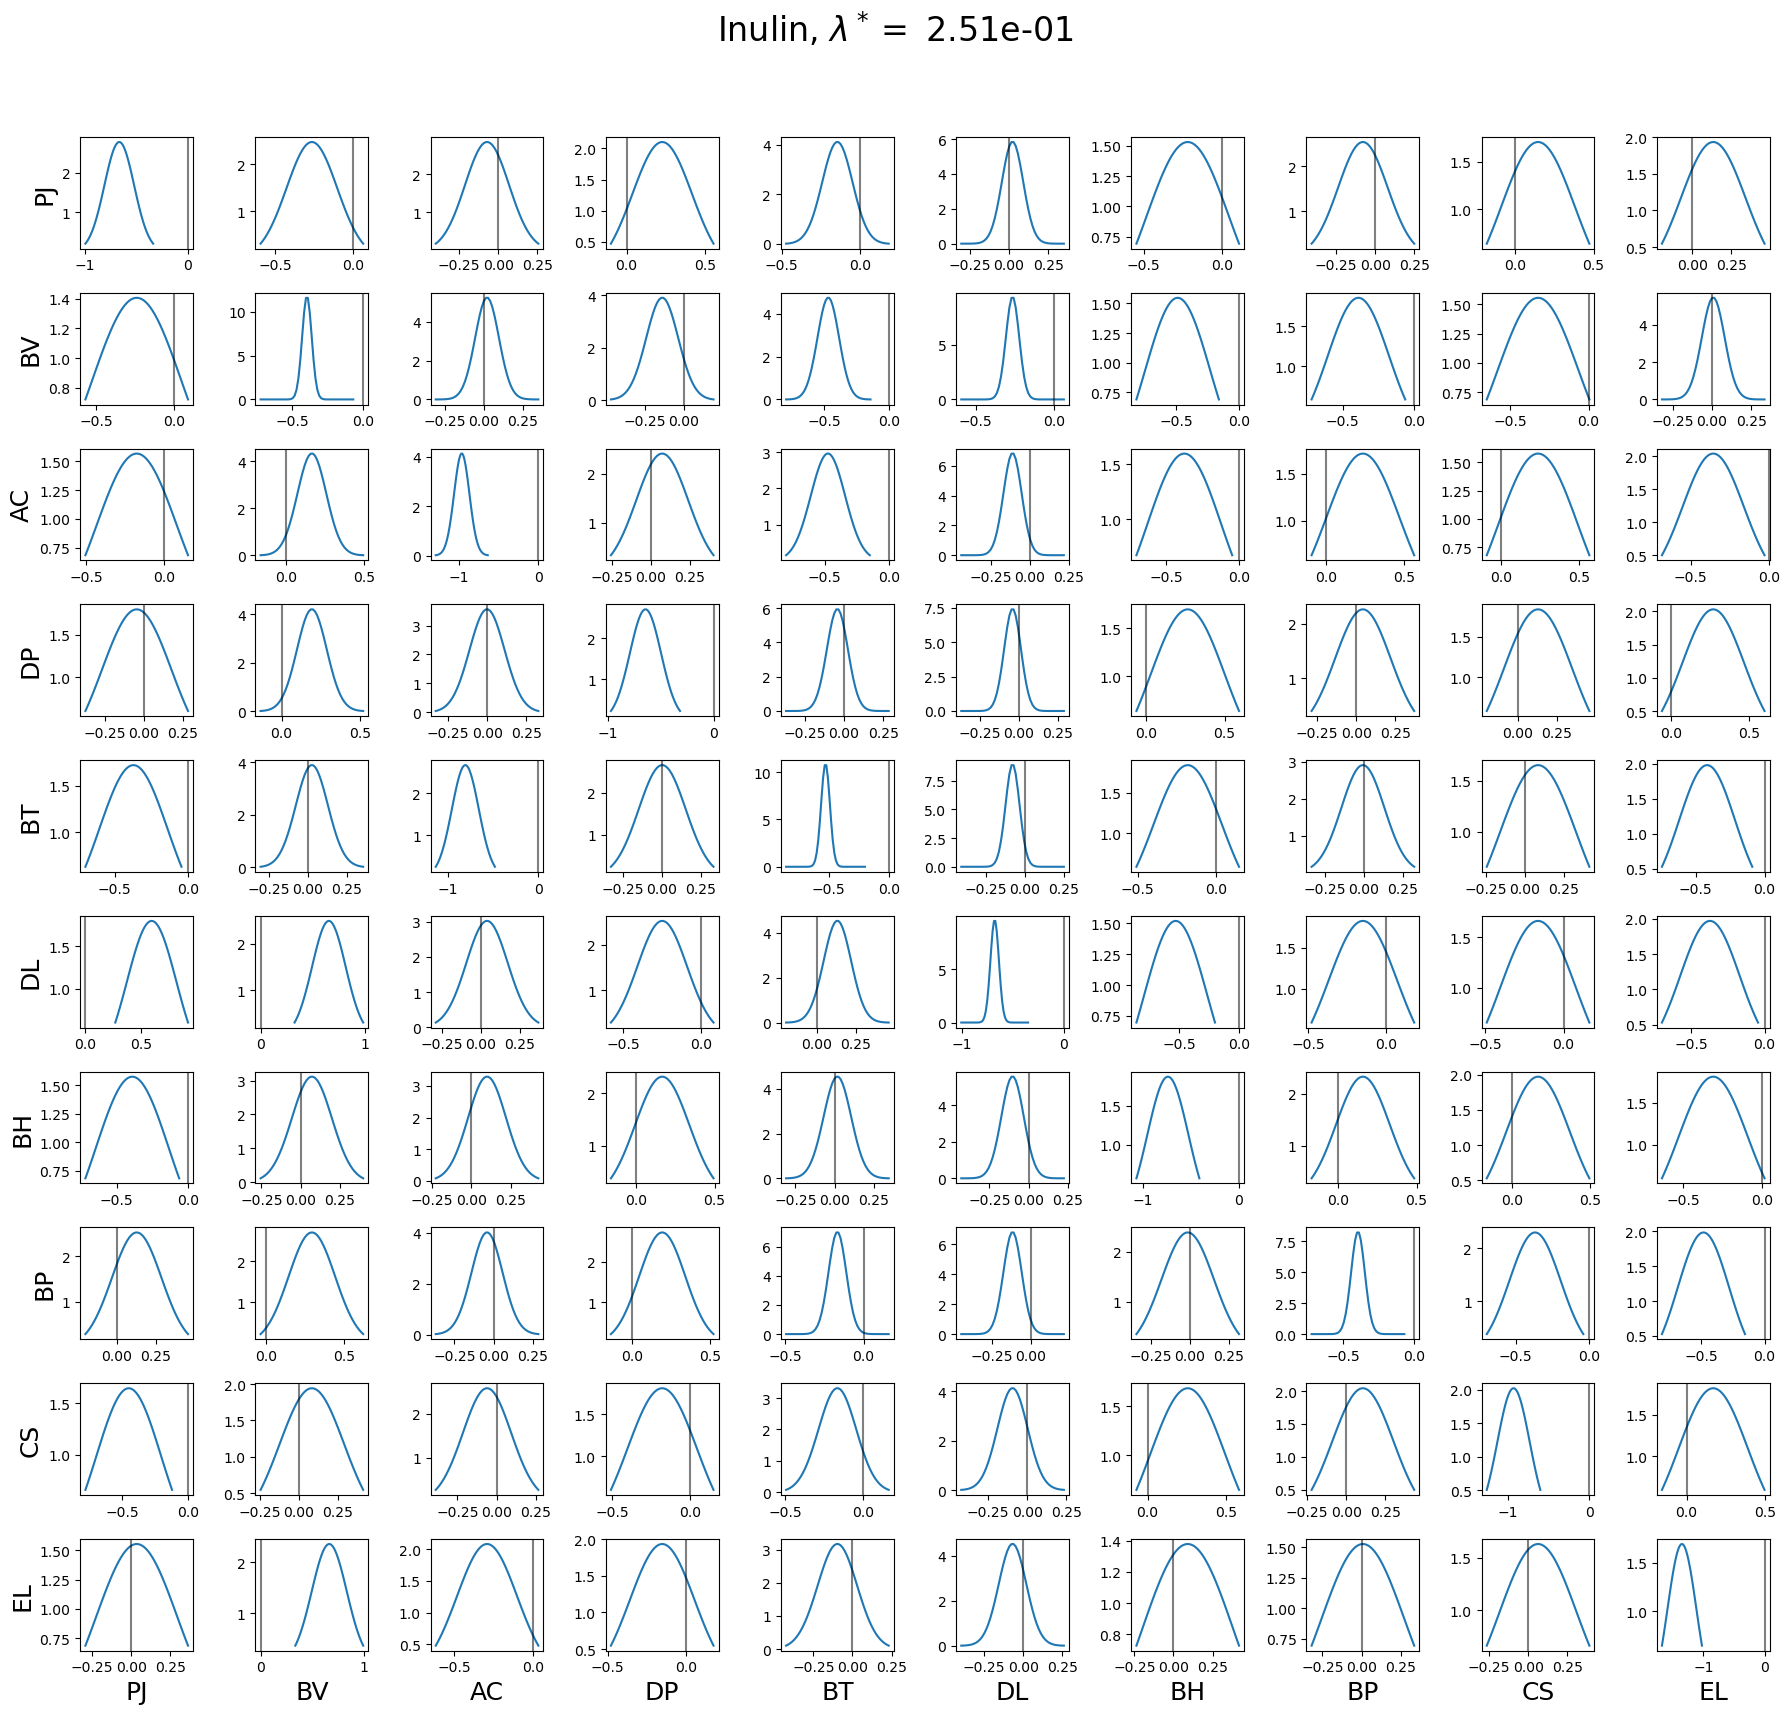

In [39]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']


Avec_inulin = gLV_model_inulin.params[gLV_model_inulin.n_species:]
Aij_std_inulin = np.sqrt(np.diag(gLV_model_inulin.Ainv))[gLV_model_inulin.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model_inulin.n_species):
    for j in range(gLV_model_inulin.n_species):
        plt.subplot(gLV_model_inulin.n_species, gLV_model_inulin.n_species, k+1)
        a = np.linspace(Avec_inulin[k]-np.std(Avec_inulin), Avec_inulin[k]+np.std(Avec_inulin))
        plt.plot(a, norm.pdf(a,Avec_inulin[k],Aij_std_inulin[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model_inulin.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset_inulin.replace("_"," "), gLV_model_inulin.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [41]:
print(f"# of parameters estimated: {len(gLV_model_inulin.params)}")

print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model_inulin.params))))

log_eigs_inulin = np.log(np.linalg.eigvalsh(gLV_model_inulin.A))
U_inulin = np.sum(log_eigs_inulin)
print("Parameter precision: {:.3f}".format(U_inulin))

# Compute Wald test for each parameter
std_errors_inulin = np.sqrt(np.diag(gLV_model_inulin.Ainv))
walds_inulin = gLV_model_inulin.params/std_errors_inulin
wald_p_vals_inulin = 2*norm.cdf(-np.abs(walds_inulin))
print(sum(wald_p_vals_inulin<.05)/len(wald_p_vals_inulin))

# of parameters estimated: 110
Maximum absolute parameter value: 1.352
Parameter precision: 499.180
0.3181818181818182


In [42]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df_Inulin = pd.DataFrame()
df_Inulin["Param name"] = param_names
df_Inulin["Param value"] = gLV_model_inulin.params
df_Inulin["Param stdv"]  = np.sqrt(np.diag(gLV_model_inulin.Ainv))
df_Inulin["Param p-value"] = wald_p_vals_inulin
for j, param_name in enumerate(param_names):
    df_Inulin[param_name]  = gLV_model_inulin.Ainv[:, j]
#df_Inulin.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df_Inulin

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.237690,0.037733,2.990120e-10,0.001424,0.000016,0.000009,0.000002,0.000025,-0.000048,...,0.000034,-1.685363e-05,-0.000038,-0.000028,-0.000043,0.000071,-0.000032,0.000010,-0.000030,0.000080
1,BV,0.459773,0.024451,7.050208e-79,0.000016,0.000598,-0.000031,-0.000010,0.000046,-0.000107,...,0.000041,-1.271934e-04,-0.000131,0.000094,-0.000012,-0.000091,0.000018,-0.000019,-0.000018,0.000140
2,AC,0.470608,0.034491,2.184180e-42,0.000009,-0.000031,0.001190,-0.000006,0.000267,0.000020,...,-0.000039,8.762831e-05,0.000088,-0.000031,0.000064,-0.000053,0.000043,-0.000051,-0.000035,-0.000276
3,DP,0.192119,0.025860,1.093577e-13,0.000002,-0.000010,-0.000006,0.000669,0.000001,0.000013,...,0.000018,8.282537e-07,0.000094,0.000217,0.000073,0.000066,0.000032,-0.000039,0.000006,0.000101
4,BT,0.472563,0.026363,7.475638e-72,0.000025,0.000046,0.000267,0.000001,0.000695,-0.000023,...,-0.000017,7.427993e-05,0.000026,-0.000037,0.000061,-0.000034,-0.000009,-0.000017,-0.000047,-0.000217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EL*DL,-0.067835,0.087982,4.407008e-01,0.000071,-0.000091,-0.000053,0.000066,-0.000034,-0.000067,...,-0.000556,-3.010535e-03,-0.006466,-0.004611,-0.001442,0.007741,0.000740,-0.000596,0.001445,0.004003
106,EL*BH,0.091178,0.289021,7.524043e-01,-0.000032,0.000018,0.000043,0.000032,-0.000009,0.000045,...,-0.003821,-2.274157e-03,-0.004776,-0.007001,-0.002612,0.000740,0.083533,-0.010182,-0.007477,0.000188
107,EL*BP,0.008762,0.261605,9.732817e-01,0.000010,-0.000019,-0.000051,-0.000039,-0.000017,-0.000010,...,-0.010825,5.222474e-04,-0.002746,-0.000587,0.001272,-0.000596,-0.010182,0.068437,-0.009901,0.003030
108,EL*CS,0.062831,0.244856,7.974838e-01,-0.000030,-0.000018,-0.000035,0.000006,-0.000047,-0.000089,...,-0.010093,1.755580e-03,0.000470,-0.000625,0.000302,0.001445,-0.007477,-0.009901,0.059954,-0.001007


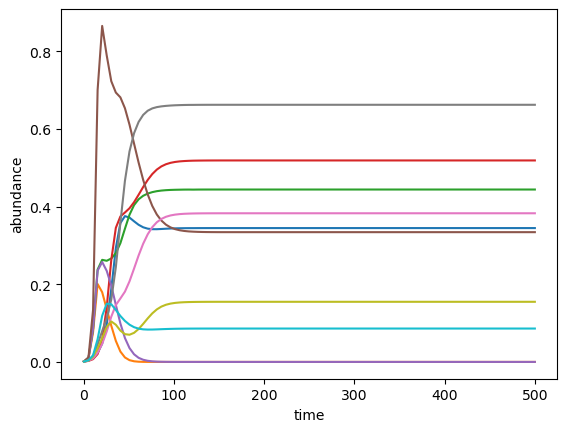

All real(eigenvalues) negative, system is stable


In [44]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model_inulin.n_species)
y = runODE(t_eval, x0, gLV_model_inulin.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model_inulin.params[:gLV_model_inulin.n_species]
A = np.reshape(gLV_model_inulin.params[gLV_model_inulin.n_species:], [gLV_model_inulin.n_species, gLV_model_inulin.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")

# LAMINARINA

## Start by importing full dataset

In [45]:
dataset_laminarin = "Laminarin"
df_laminarin = pd.read_csv(f"Data_Params/{dataset_laminarin}_full.csv")
print(df_laminarin.shape)
df_laminarin.head()


(365, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC,0.0,0.002203,0.000993,0.000136,0.012765,0.025336,0.000326,0.000351,0.000085,0.002739,0.002457
1,COMM10<AC,24.0,0.030920,0.015134,0.000510,0.259270,0.797605,0.003854,0.005196,0.000068,0.057027,0.060104
2,COMM10<BH,0.0,0.001691,0.000537,0.000036,0.014456,0.030776,0.000316,0.001461,0.000045,0.002443,0.003267
3,COMM10<BH,24.0,0.026333,0.009626,0.000733,0.296917,0.872549,0.004611,0.013494,0.000208,0.054694,0.089174
4,COMM10<BP,0.0,0.001791,0.000477,0.000056,0.014071,0.023390,0.000513,0.000351,0.000841,0.002634,0.002788


## Initialize model parameters (all zeros except self-interaction terms=-1)

In [46]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1

Model has 110 parameters


## Run optimization to find regularized parameters

In [47]:
# instantiate gLV fit 
gLV_model_laminarin = ODE(df_laminarin, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model_laminarin.fit()
# print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


100%|██████████| 88/88 [00:00<00:00, 366.67it/s]


Iteration: 0, Loss: 6.155e+02, Convergence rate: inf
Iteration: 1, Loss: 6.056e+02, Convergence rate: 1.600e-02
Iteration: 2, Loss: 5.959e+02, Convergence rate: 1.597e-02
Iteration: 3, Loss: 5.864e+02, Convergence rate: 1.593e-02
Iteration: 4, Loss: 5.771e+02, Convergence rate: 1.591e-02
Iteration: 5, Loss: 5.679e+02, Convergence rate: 1.589e-02
Iteration: 6, Loss: 5.589e+02, Convergence rate: 1.586e-02
Iteration: 7, Loss: 5.501e+02, Convergence rate: 1.582e-02
Iteration: 8, Loss: 5.414e+02, Convergence rate: 1.580e-02
Iteration: 9, Loss: 5.329e+02, Convergence rate: 1.576e-02
Iteration: 10, Loss: 5.245e+02, Convergence rate: 1.572e-02
Iteration: 11, Loss: 5.163e+02, Convergence rate: 1.570e-02
Iteration: 12, Loss: 5.082e+02, Convergence rate: 1.565e-02
Iteration: 13, Loss: 5.002e+02, Convergence rate: 1.562e-02
Iteration: 14, Loss: 4.924e+02, Convergence rate: 1.559e-02
Iteration: 15, Loss: 4.848e+02, Convergence rate: 1.555e-02
Iteration: 16, Loss: 4.773e+02, Convergence rate: 1.551e

100%|██████████| 88/88 [00:00<00:00, 217.26it/s]


Total samples: 1231, Updated regularization: 2.40e-02
Iteration: 0, Loss: 4.861e+02, Convergence rate: inf
Iteration: 1, Loss: 4.829e+02, Convergence rate: 6.633e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 4.766e+02, Convergence rate: 1.299e-02
Iteration: 3, Loss: 4.706e+02, Convergence rate: 1.264e-02
Iteration: 4, Loss: 4.648e+02, Convergence rate: 1.228e-02
Iteration: 5, Loss: 4.593e+02, Convergence rate: 1.196e-02
Iteration: 6, Loss: 4.539e+02, Convergence rate: 1.163e-02
Iteration: 7, Loss: 4.488e+02, Convergence rate: 1.129e-02
Iteration: 8, Loss: 4.439e+02, Convergence rate: 1.097e-02
Iteration: 9, Loss: 4.392e+02, Convergence rate: 1.066e-02
Iteration: 10, Loss: 4.346e+02, Convergence rate: 1.035e-02
Iteration: 11, Loss: 4.302e+02, Convergence rate: 1.005e-02
Iteration: 12, Loss: 4.261e+02, Convergence rate: 9.748e-03
Step size set to 4.000e-02
Evidence 30289.074
Updating precision...


100%|██████████| 88/88 [00:00<00:00, 202.84it/s]


Total samples: 1231, Updated regularization: 3.07e-02
Iteration: 0, Loss: 5.898e+02, Convergence rate: inf
Iteration: 1, Loss: 5.871e+02, Convergence rate: 4.518e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 5.819e+02, Convergence rate: 8.885e-03
Step size set to 4.000e-02
Evidence 32074.557
Updating precision...


100%|██████████| 88/88 [00:00<00:00, 202.47it/s]


Total samples: 1231, Updated regularization: 3.43e-02
Iteration: 0, Loss: 6.110e+02, Convergence rate: inf
Iteration: 1, Loss: 6.084e+02, Convergence rate: 4.227e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 6.034e+02, Convergence rate: 8.254e-03
Step size set to 4.000e-02
Evidence 32319.820


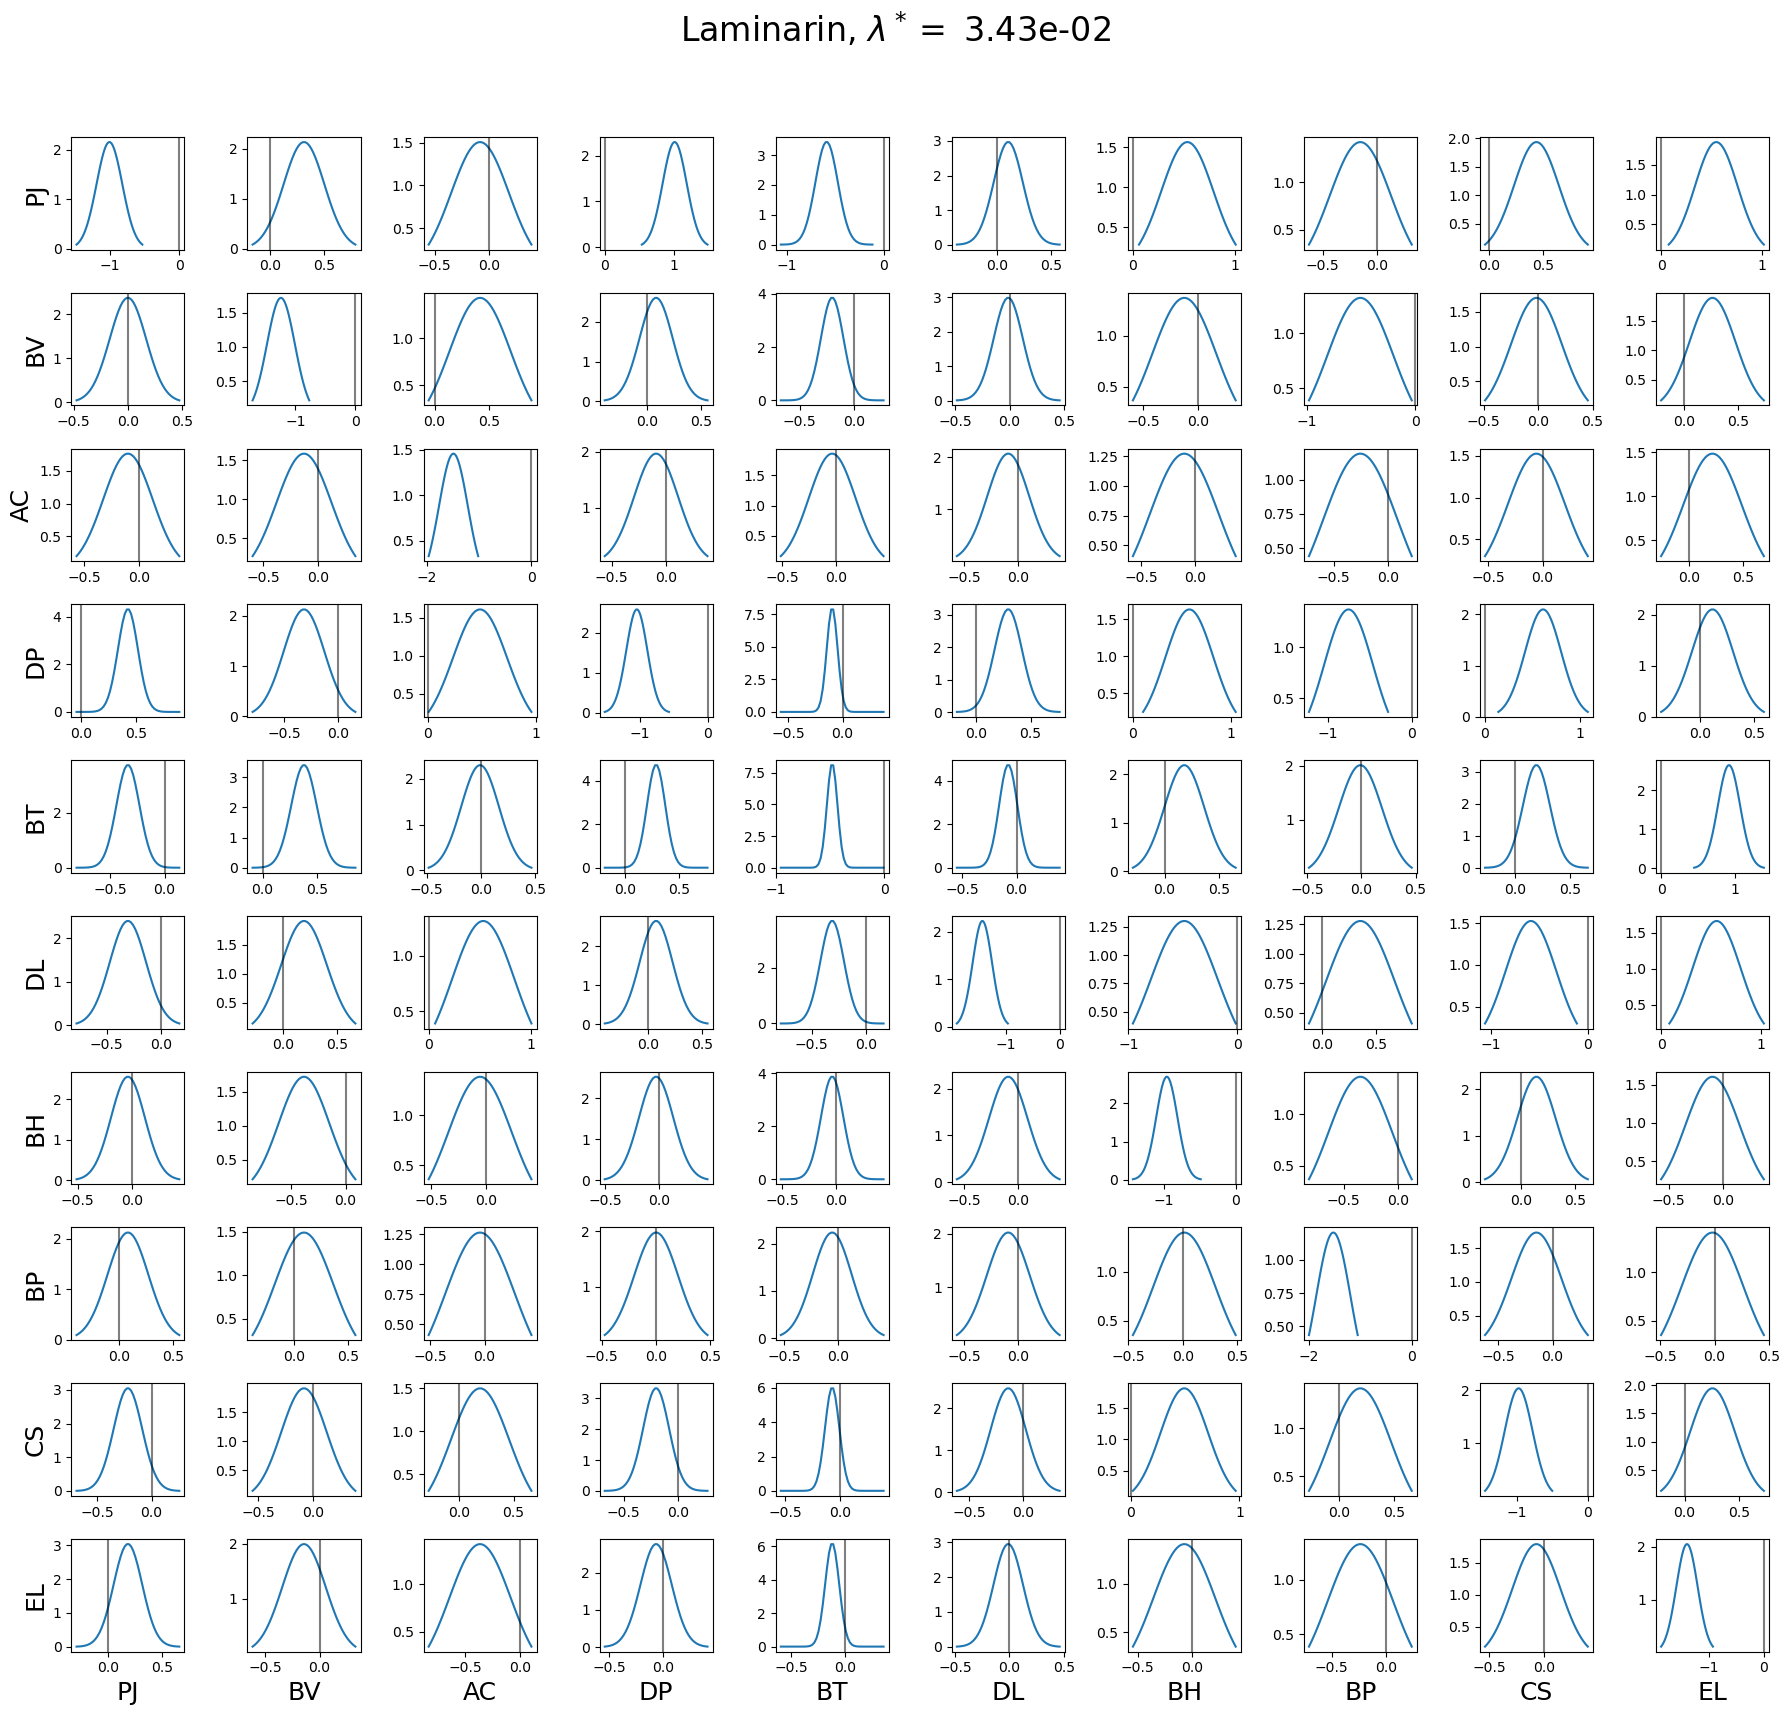

In [48]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']

Avec_laminarin = gLV_model_laminarin.params[gLV_model_laminarin.n_species:]
Aij_std_laminarin = np.sqrt(np.diag(gLV_model_laminarin.Ainv))[gLV_model_laminarin.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model_laminarin.n_species):
    for j in range(gLV_model_laminarin.n_species):
        plt.subplot(gLV_model_laminarin.n_species, gLV_model_laminarin.n_species, k+1)
        a = np.linspace(Avec_laminarin[k]-np.std(Avec_laminarin), Avec_laminarin[k]+np.std(Avec_laminarin))
        plt.plot(a, norm.pdf(a,Avec_laminarin[k],Aij_std_laminarin[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model_laminarin.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset_laminarin.replace("_"," "), gLV_model_laminarin.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [49]:
print(f"# of parameters estimated: {len(gLV_model_laminarin.params)}")

print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model_laminarin.params))))

log_eigs_laminarin = np.log(np.linalg.eigvalsh(gLV_model_laminarin.A))
U_laminarin = np.sum(log_eigs_laminarin)
print("Parameter precision: {:.3f}".format(U_laminarin))

# Compute Wald test for each parameter
std_errors_laminarin = np.sqrt(np.diag(gLV_model_laminarin.Ainv))
walds_laminarin = gLV_model_laminarin.params/std_errors_laminarin
wald_p_vals_laminarin = 2*norm.cdf(-np.abs(walds_laminarin))
print(sum(wald_p_vals_laminarin<.05)/len(wald_p_vals_laminarin))

# of parameters estimated: 110
Maximum absolute parameter value: 1.522
Parameter precision: 457.828
0.34545454545454546


In [50]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df_Laminarin = pd.DataFrame()
df_Laminarin["Param name"] = param_names
df_Laminarin["Param value"] = gLV_model_laminarin.params
df_Laminarin["Param stdv"]  = np.sqrt(np.diag(gLV_model_laminarin.Ainv))
df_Laminarin["Param p-value"] = wald_p_vals_laminarin
for j, param_name in enumerate(param_names):
    df_Laminarin[param_name]  = gLV_model_laminarin.Ainv[:, j]
#df_Laminarin.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df_Laminarin

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.188439,0.024148,6.013063e-15,0.000583,-0.000027,5.864984e-06,-0.000096,3.533901e-05,9.630274e-06,...,-0.000257,-0.000109,-0.000138,0.000036,-0.000016,0.000018,-0.000090,-0.000047,-3.797471e-06,-0.000042
1,BV,0.242321,0.036599,3.568595e-11,-0.000027,0.001339,-1.171572e-05,0.000043,-4.149418e-06,-7.386668e-06,...,-0.000009,0.000436,-0.000033,0.000005,0.000036,0.000117,0.000068,0.000019,-1.102834e-05,-0.000018
2,AC,0.207367,0.030118,5.771891e-12,0.000006,-0.000012,9.070864e-04,-0.000028,-4.552370e-07,-1.442517e-05,...,0.000014,0.000084,0.000416,0.000023,-0.000038,0.000039,0.000055,0.000041,-2.111599e-07,-0.000102
3,DP,0.232801,0.024377,1.298616e-21,-0.000096,0.000043,-2.835979e-05,0.000594,-1.438127e-05,-1.652347e-05,...,-0.000021,0.000044,0.000146,0.000184,0.000057,-0.000022,-0.000094,-0.000046,-1.037938e-04,0.000044
4,BT,0.188358,0.009546,1.163103e-86,0.000035,-0.000004,-4.552370e-07,-0.000014,9.112957e-05,9.402389e-07,...,-0.000047,0.000100,0.000055,0.000164,0.000157,-0.000039,-0.000156,0.000012,-1.165711e-04,0.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EL*DL,-0.011486,0.135249,9.323199e-01,0.000018,0.000117,3.917244e-05,-0.000022,-3.886568e-05,8.152190e-05,...,0.000143,-0.008891,-0.002141,-0.002429,0.000535,0.018292,0.003376,-0.001230,4.323678e-03,0.003413
106,EL*BH,-0.072055,0.283969,7.996940e-01,-0.000090,0.000068,5.503661e-05,-0.000094,-1.558604e-04,2.764164e-05,...,-0.006542,-0.000469,-0.003156,-0.004794,0.001889,0.003376,0.080638,-0.010841,-7.803343e-03,0.006958
107,EL*BP,-0.235447,0.300024,4.325951e-01,-0.000047,0.000019,4.081038e-05,-0.000046,1.201611e-05,9.372111e-05,...,-0.005717,-0.001598,-0.000211,-0.001184,0.002299,-0.001230,-0.010841,0.090015,-2.529513e-03,0.008303
108,EL*CS,-0.066917,0.222239,7.633354e-01,-0.000004,-0.000011,-2.111599e-07,-0.000104,-1.165711e-04,-1.519580e-05,...,-0.001925,-0.004053,0.003321,-0.011583,0.000328,0.004324,-0.007803,-0.002530,4.939004e-02,0.004936


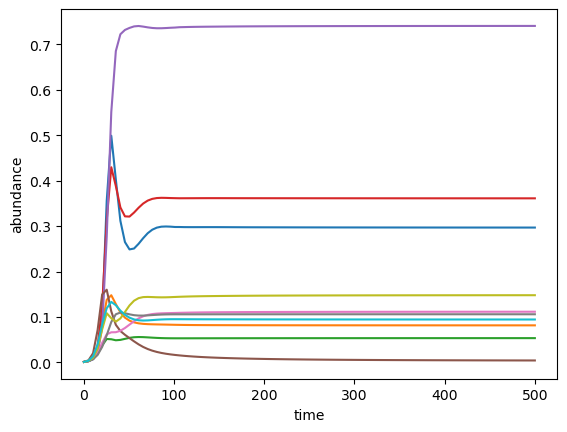

All real(eigenvalues) negative, system is stable


In [51]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model_laminarin.n_species)
y = runODE(t_eval, x0, gLV_model_laminarin.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model_laminarin.params[:gLV_model_laminarin.n_species]
A = np.reshape(gLV_model_laminarin.params[gLV_model_laminarin.n_species:], [gLV_model_laminarin.n_species, gLV_model_laminarin.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")

# XYLANO

## Start by importing full dataset

In [52]:
dataset_xylan= "Xylan"
df_xylan = pd.read_csv(f"Data_Params/{dataset_xylan}_full.csv")
print(df_xylan.shape)
df_xylan.head()


(368, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC,0.0,0.000740,0.008114,0.000094,0.019457,0.008972,0.000989,0.002260,0.000106,0.001997,0.008326
1,COMM10<AC,24.0,0.010516,0.195708,0.000190,0.399070,0.193171,0.015351,0.046167,0.000684,0.034362,0.187880
2,COMM10<BH,0.0,0.000557,0.008964,0.000008,0.016216,0.008195,0.001158,0.002447,0.000061,0.001787,0.006393
3,COMM10<BH,24.0,0.010656,0.219933,0.000061,0.362371,0.178817,0.017909,0.037363,0.000395,0.031597,0.166121
4,COMM10<BP,0.0,0.000516,0.007836,0.000041,0.013691,0.006378,0.000646,0.001598,0.000911,0.002335,0.012563


## Initialize model parameters (all zeros except self-interaction terms=-1)

In [53]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1

Model has 110 parameters


## Run optimization to find regularized parameters

In [54]:
# instantiate gLV fit 
gLV_model_xylan = ODE(df_xylan, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model_xylan.fit()
# print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


  0%|          | 0/83 [00:00<?, ?it/s]

100%|██████████| 83/83 [00:00<00:00, 361.94it/s]


Iteration: 0, Loss: 5.869e+02, Convergence rate: inf
Iteration: 1, Loss: 5.775e+02, Convergence rate: 1.602e-02
Iteration: 2, Loss: 5.683e+02, Convergence rate: 1.596e-02
Iteration: 3, Loss: 5.593e+02, Convergence rate: 1.589e-02
Iteration: 4, Loss: 5.504e+02, Convergence rate: 1.583e-02
Iteration: 5, Loss: 5.417e+02, Convergence rate: 1.577e-02
Iteration: 6, Loss: 5.332e+02, Convergence rate: 1.572e-02
Iteration: 7, Loss: 5.249e+02, Convergence rate: 1.565e-02
Iteration: 8, Loss: 5.167e+02, Convergence rate: 1.558e-02
Iteration: 9, Loss: 5.087e+02, Convergence rate: 1.553e-02
Iteration: 10, Loss: 5.008e+02, Convergence rate: 1.545e-02
Iteration: 11, Loss: 4.931e+02, Convergence rate: 1.540e-02
Iteration: 12, Loss: 4.856e+02, Convergence rate: 1.532e-02
Iteration: 13, Loss: 4.781e+02, Convergence rate: 1.526e-02
Iteration: 14, Loss: 4.709e+02, Convergence rate: 1.519e-02
Iteration: 15, Loss: 4.638e+02, Convergence rate: 1.513e-02
Iteration: 16, Loss: 4.568e+02, Convergence rate: 1.504e

100%|██████████| 83/83 [00:00<00:00, 172.25it/s]


Total samples: 1174, Updated regularization: 1.62e-02
Iteration: 0, Loss: 4.652e+02, Convergence rate: inf
Iteration: 1, Loss: 4.630e+02, Convergence rate: 4.726e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 4.587e+02, Convergence rate: 9.246e-03
Step size set to 4.000e-02
Evidence 30802.000
Updating precision...


100%|██████████| 83/83 [00:00<00:00, 155.72it/s]


Total samples: 1174, Updated regularization: 2.64e-02
Iteration: 0, Loss: 5.659e+02, Convergence rate: inf
Iteration: 1, Loss: 5.636e+02, Convergence rate: 3.995e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 5.592e+02, Convergence rate: 7.814e-03
Step size set to 4.000e-02
Evidence 31831.078
Updating precision...


100%|██████████| 83/83 [00:00<00:00, 169.78it/s]


Total samples: 1174, Updated regularization: 2.96e-02
Iteration: 0, Loss: 5.827e+02, Convergence rate: inf
Iteration: 1, Loss: 5.806e+02, Convergence rate: 3.693e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 5.764e+02, Convergence rate: 7.237e-03
Step size set to 4.000e-02
Evidence 32021.582


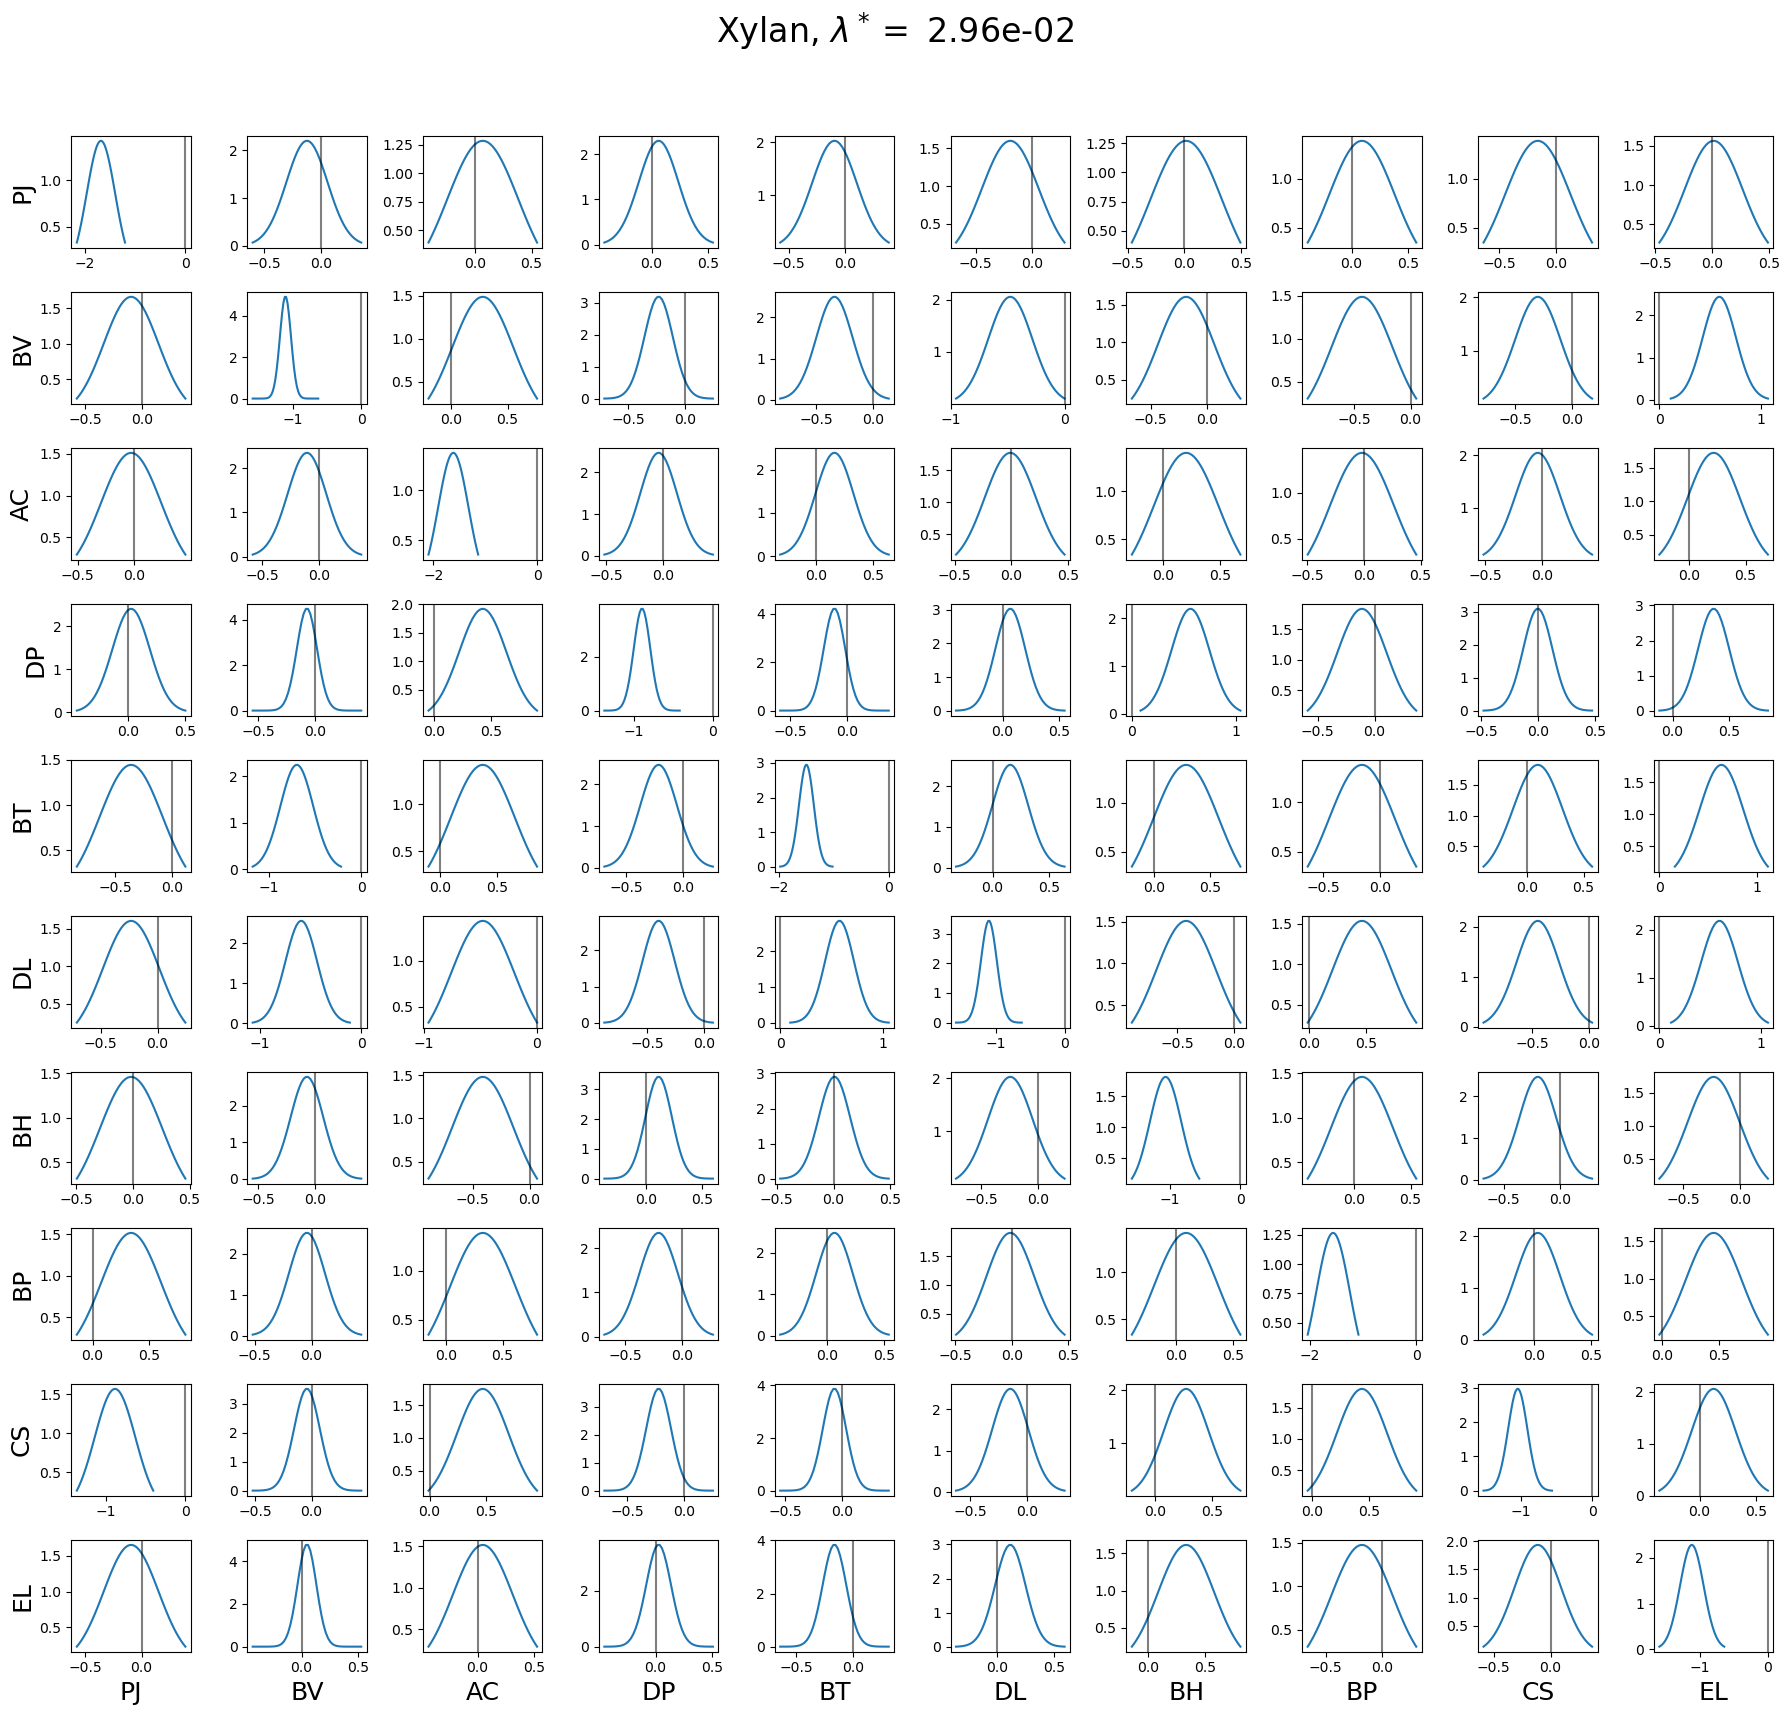

In [55]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']

Avec_xylan = gLV_model_xylan.params[gLV_model_xylan.n_species:]
Aij_std_xylan = np.sqrt(np.diag(gLV_model_xylan.Ainv))[gLV_model_xylan.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model_xylan.n_species):
    for j in range(gLV_model_xylan.n_species):
        plt.subplot(gLV_model_xylan.n_species, gLV_model_xylan.n_species, k+1)
        a = np.linspace(Avec_xylan[k]-np.std(Avec_xylan), Avec_xylan[k]+np.std(Avec_xylan))
        plt.plot(a, norm.pdf(a,Avec_xylan[k],Aij_std_xylan[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model_xylan.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset_xylan.replace("_"," "), gLV_model_xylan.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [56]:
print(f"# of parameters estimated: {len(gLV_model_xylan.params)}")

print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model_xylan.params))))

log_eigs_xylan = np.log(np.linalg.eigvalsh(gLV_model_xylan.A))
U_xylan = np.sum(log_eigs_xylan)
print("Parameter precision: {:.3f}".format(U_xylan))

# Compute Wald test for each parameter
std_errors_xylan = np.sqrt(np.diag(gLV_model_xylan.Ainv))
walds_xylan = gLV_model_xylan.params/std_errors_xylan
wald_p_vals_xylan = 2*norm.cdf(-np.abs(walds_xylan))
print(sum(wald_p_vals_xylan<.05)/len(wald_p_vals_xylan))

# of parameters estimated: 110
Maximum absolute parameter value: 1.677
Parameter precision: 448.688
0.33636363636363636


In [57]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df_Xylan = pd.DataFrame()
df_Xylan["Param name"] = param_names
df_Xylan["Param value"] = gLV_model_xylan.params
df_Xylan["Param stdv"]  = np.sqrt(np.diag(gLV_model_xylan.Ainv))
df_Xylan["Param p-value"] = wald_p_vals_xylan
for j, param_name in enumerate(param_names):
    df_Xylan[param_name]  = gLV_model_xylan.Ainv[:, j]
#df_Xylan.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df_Xylan

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.254899,0.031517,6.078245e-16,0.000993,0.000007,0.000002,-0.000003,0.000023,0.000015,...,0.000145,-0.000002,0.000015,9.328544e-07,-0.000011,0.000001,-0.000003,0.000045,0.000039,-0.000015
1,BV,0.368903,0.021287,2.777056e-67,0.000007,0.000453,-0.000007,0.000008,0.000080,0.000038,...,0.000014,-0.000007,0.000003,-3.815455e-05,0.000025,0.000012,0.000014,0.000015,0.000003,0.000055
2,AC,0.193125,0.029101,3.215860e-11,0.000002,-0.000007,0.000847,-0.000008,-0.000015,0.000017,...,-0.000038,0.000002,-0.000040,-4.445006e-06,0.000008,0.000021,0.000005,-0.000002,0.000021,-0.000031
3,DP,0.245039,0.020379,2.659616e-33,-0.000003,0.000008,-0.000008,0.000415,0.000016,0.000006,...,0.000114,0.000043,0.000052,-4.071977e-05,0.000108,0.000051,0.000045,0.000110,-0.000015,0.000184
4,BT,0.405058,0.024456,1.289879e-61,0.000023,0.000080,-0.000015,0.000016,0.000598,-0.000035,...,0.000020,0.000019,0.000050,-3.066404e-05,0.000109,-0.000004,0.000017,0.000017,0.000037,0.000034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EL*DL,0.117464,0.133368,3.784533e-01,0.000001,0.000012,0.000021,0.000051,-0.000004,-0.000005,...,-0.000824,0.000086,-0.001614,-8.341583e-04,-0.003121,0.017787,0.000411,-0.001930,0.005105,0.000636
106,EL*BH,0.333196,0.246921,1.772084e-01,-0.000003,0.000014,0.000005,0.000045,0.000017,-0.000033,...,-0.001538,-0.002297,0.003087,-8.060031e-03,0.000058,0.000411,0.060970,-0.003568,-0.002851,-0.000346
107,EL*BP,-0.179270,0.270091,5.068567e-01,0.000045,0.000015,-0.000002,0.000110,0.000017,-0.000004,...,-0.020481,0.000653,-0.009238,-1.293773e-03,0.007267,-0.001930,-0.003568,0.072949,-0.006067,0.008143
108,EL*CS,-0.112333,0.206265,5.860253e-01,0.000039,0.000003,0.000021,-0.000015,0.000037,0.000004,...,-0.001683,0.000213,-0.001439,-8.132340e-03,0.000438,0.005105,-0.002851,-0.006067,0.042545,0.007816


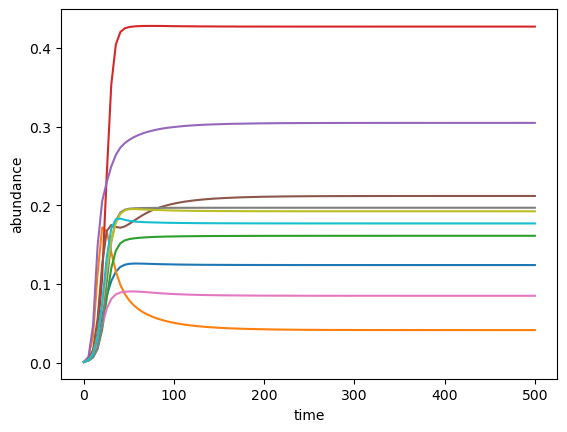

All real(eigenvalues) negative, system is stable


In [58]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model_xylan.n_species)
y = runODE(t_eval, x0, gLV_model_xylan.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model_xylan.params[:gLV_model_xylan.n_species]
A = np.reshape(gLV_model_xylan.params[gLV_model_xylan.n_species:], [gLV_model_xylan.n_species, gLV_model_laminarin.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")

# NO CARBON

## Start by importing full dataset

In [59]:
dataset_nocarb= "No carb"
df_nocarb = pd.read_csv(f"Data_Params/{dataset_nocarb}_full.csv")
print(df_nocarb.shape)
df_nocarb.head()


(305, 12)


,Treatments,Time,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,COMM10<AC,0.0,0.000362,0.000252,0.000083,0.019794,0.000646,0.000169,0.000467,0.000067,0.000955,0.003588
1,COMM10<AC,24.0,0.002086,0.002797,0.000000,0.430171,0.010390,0.002022,0.008255,0.000037,0.014133,0.090492
2,COMM10<BH,0.0,0.000164,0.000250,0.000023,0.014909,0.000536,0.000148,0.000902,0.000064,0.001720,0.007895
3,COMM10<BH,24.0,0.001271,0.003837,0.000358,0.327210,0.008606,0.001983,0.003850,0.000592,0.027869,0.133891
4,COMM10<BP,0.0,0.000213,0.000133,0.000018,0.018980,0.000273,0.000453,0.000265,0.000675,0.001036,0.003074


## Initialize model parameters (all zeros except self-interaction terms=-1)

In [60]:
# specify species and metabolite names 
species = ['S'+str(i+1) for i in range(10)]

# compute number of parameters
dimx = len(species)
n_params = dimx + dimx*dimx
print(f"Model has {n_params} parameters")

# set initial parameter guess 
params = np.zeros(n_params)
params[:dimx] = 0.3
k = dimx
for i in range(dimx):
    for j in range(dimx):
        if i == j:
            params[k] = -1.
        k+=1

Model has 110 parameters


## Run optimization to find regularized parameters

In [61]:
# instantiate gLV fit 
gLV_model_nocarb = ODE(df_nocarb, params, species, n_jobs=4)

# fit to data 
t0 = time.time()
gLV_model_nocarb.fit()
# print("Elapsed: {:.3f}".format(time.time()-t0))


Running gradient descent...
Updating precision...


100%|██████████| 71/71 [00:00<00:00, 411.72it/s]


Iteration: 0, Loss: 3.979e+02, Convergence rate: inf
Iteration: 1, Loss: 3.907e+02, Convergence rate: 1.831e-02
Iteration: 2, Loss: 3.835e+02, Convergence rate: 1.829e-02
Iteration: 3, Loss: 3.765e+02, Convergence rate: 1.827e-02
Iteration: 4, Loss: 3.697e+02, Convergence rate: 1.822e-02
Iteration: 5, Loss: 3.629e+02, Convergence rate: 1.819e-02
Iteration: 6, Loss: 3.563e+02, Convergence rate: 1.817e-02
Iteration: 7, Loss: 3.499e+02, Convergence rate: 1.813e-02
Iteration: 8, Loss: 3.435e+02, Convergence rate: 1.810e-02
Iteration: 9, Loss: 3.373e+02, Convergence rate: 1.805e-02
Iteration: 10, Loss: 3.313e+02, Convergence rate: 1.803e-02
Iteration: 11, Loss: 3.253e+02, Convergence rate: 1.799e-02
Iteration: 12, Loss: 3.195e+02, Convergence rate: 1.797e-02
Iteration: 13, Loss: 3.137e+02, Convergence rate: 1.792e-02
Iteration: 14, Loss: 3.081e+02, Convergence rate: 1.786e-02
Iteration: 15, Loss: 3.026e+02, Convergence rate: 1.785e-02
Iteration: 16, Loss: 2.972e+02, Convergence rate: 1.781e

100%|██████████| 71/71 [00:00<00:00, 215.46it/s]


Total samples: 796, Updated regularization: 1.71e-02
Iteration: 0, Loss: 2.738e+02, Convergence rate: inf
Iteration: 1, Loss: 2.707e+02, Convergence rate: 1.161e-02
Iteration: 2, Loss: 2.675e+02, Convergence rate: 1.150e-02
Iteration: 3, Loss: 2.645e+02, Convergence rate: 1.138e-02
Iteration: 4, Loss: 2.615e+02, Convergence rate: 1.132e-02
Iteration: 5, Loss: 2.586e+02, Convergence rate: 1.116e-02
Iteration: 6, Loss: 2.557e+02, Convergence rate: 1.105e-02
Iteration: 7, Loss: 2.529e+02, Convergence rate: 1.100e-02
Iteration: 8, Loss: 2.502e+02, Convergence rate: 1.080e-02
Iteration: 9, Loss: 2.475e+02, Convergence rate: 1.077e-02
Iteration: 10, Loss: 2.449e+02, Convergence rate: 1.066e-02
Iteration: 11, Loss: 2.423e+02, Convergence rate: 1.054e-02
Iteration: 12, Loss: 2.397e+02, Convergence rate: 1.045e-02
Iteration: 13, Loss: 2.373e+02, Convergence rate: 1.029e-02
Iteration: 14, Loss: 2.348e+02, Convergence rate: 1.021e-02
Iteration: 15, Loss: 2.325e+02, Convergence rate: 1.011e-02
Ite

100%|██████████| 71/71 [00:00<00:00, 170.82it/s]


Total samples: 796, Updated regularization: 1.21e-02
Iteration: 0, Loss: 3.440e+02, Convergence rate: inf
Iteration: 1, Loss: 3.422e+02, Convergence rate: 5.295e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 3.387e+02, Convergence rate: 1.035e-02
Iteration: 3, Loss: 3.353e+02, Convergence rate: 1.006e-02
Iteration: 4, Loss: 3.320e+02, Convergence rate: 9.731e-03
Step size set to 4.000e-02
Evidence 23304.154
Updating precision...


100%|██████████| 71/71 [00:00<00:00, 212.00it/s]


Total samples: 796, Updated regularization: 1.43e-02
Iteration: 0, Loss: 3.852e+02, Convergence rate: inf
Iteration: 1, Loss: 3.835e+02, Convergence rate: 4.422e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 3.802e+02, Convergence rate: 8.701e-03
Step size set to 4.000e-02
Evidence 23810.743
Updating precision...


100%|██████████| 71/71 [00:00<00:00, 232.30it/s]


Total samples: 796, Updated regularization: 1.52e-02
Iteration: 0, Loss: 3.942e+02, Convergence rate: inf
Iteration: 1, Loss: 3.926e+02, Convergence rate: 4.142e-03
Step size set to 2.000e-02
Iteration: 2, Loss: 3.894e+02, Convergence rate: 8.111e-03
Step size set to 4.000e-02
Evidence 23929.323


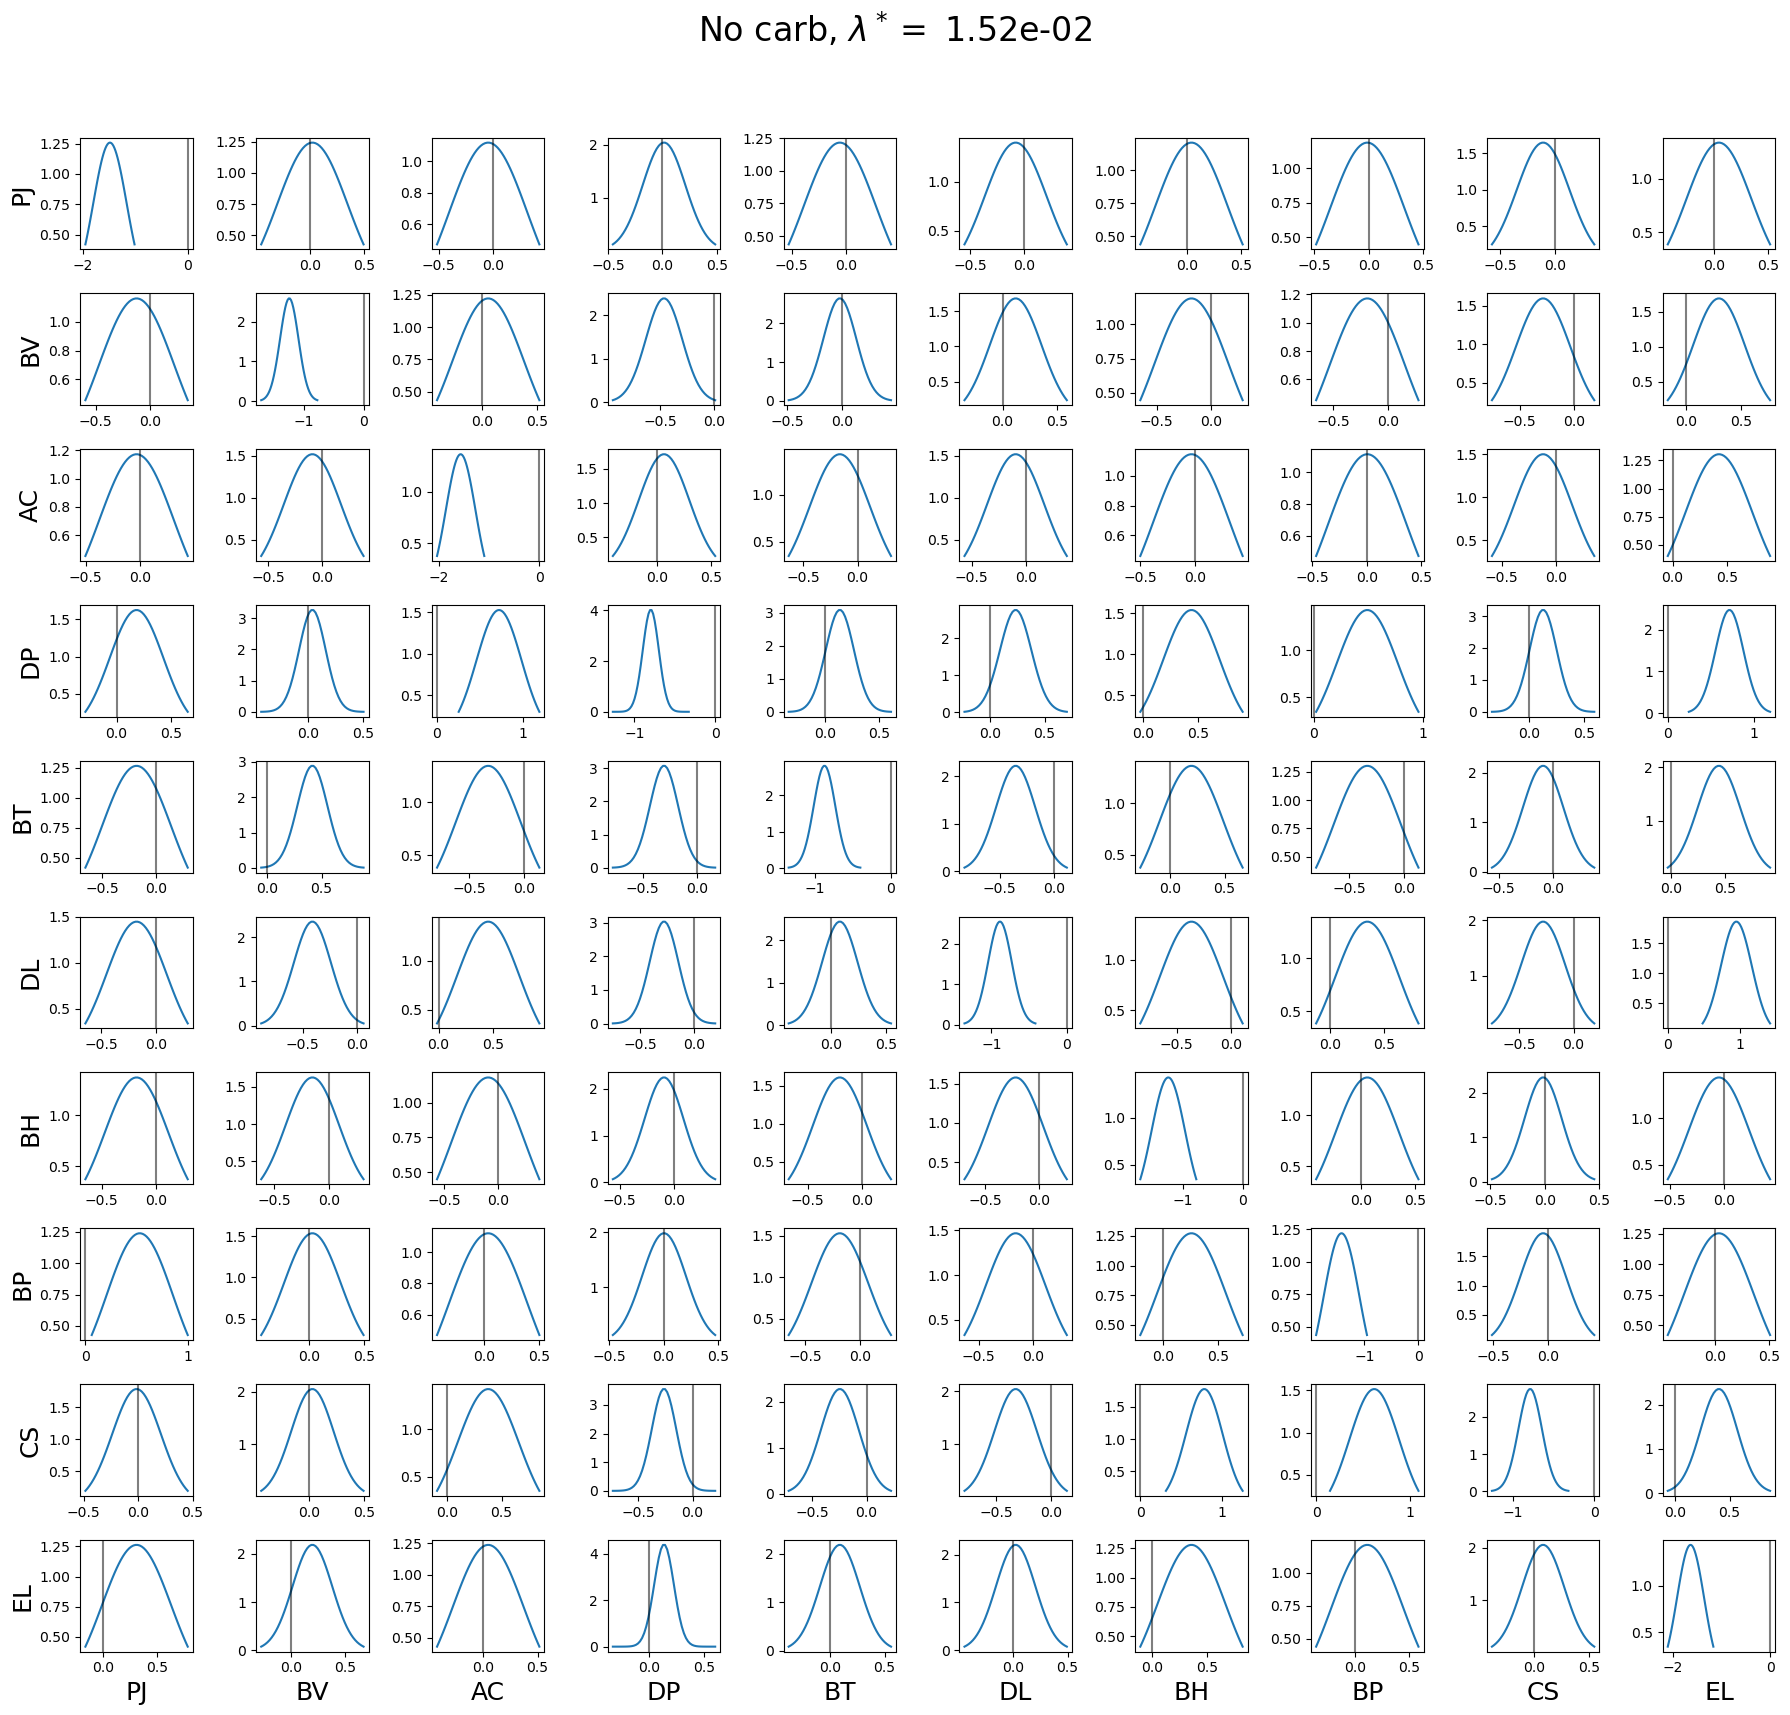

In [62]:
# define species names 
species = ['PJ','BV','AC','DP','BT','DL','BH','BP','CS','EL']

Avec_nocarb = gLV_model_nocarb.params[gLV_model_nocarb.n_species:]
Aij_std_nocarb = np.sqrt(np.diag(gLV_model_nocarb.Ainv))[gLV_model_nocarb.n_species:]

plt.figure(figsize=(18,18))
# set counter for parameter std. 
k = 0

for i in range(gLV_model_nocarb.n_species):
    for j in range(gLV_model_nocarb.n_species):
        plt.subplot(gLV_model_nocarb.n_species, gLV_model_nocarb.n_species, k+1)
        a = np.linspace(Avec_nocarb[k]-np.std(Avec_nocarb), Avec_nocarb[k]+np.std(Avec_nocarb))
        plt.plot(a, norm.pdf(a,Avec_nocarb[k],Aij_std_nocarb[k]))
        plt.axvline(x=0, c='k', alpha=.5)
        k += 1
        if j == 0:
            plt.ylabel(species[i], fontsize=18)
        if i == gLV_model_nocarb.n_species-1:
            plt.xlabel(species[j], fontsize=18)
        #plt.xlim([-2,2])
            
plt.suptitle(r"{}, $\lambda^* = $ {:.2e}".format(dataset_nocarb.replace("_"," "), gLV_model_nocarb.lmbda), fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig("Figures/{}ParamDist_RmOutlier.pdf".format(dataset.replace("_","")))
plt.show()

In [63]:
print(f"# of parameters estimated: {len(gLV_model_nocarb.params)}")

print("Maximum absolute parameter value: {:.3f}".format(max(abs(gLV_model_nocarb.params))))

log_eigs_nocarb = np.log(np.linalg.eigvalsh(gLV_model_nocarb.A))
U_nocarb = np.sum(log_eigs_nocarb)
print("Parameter precision: {:.3f}".format(U_nocarb))

# Compute Wald test for each parameter
std_errors_nocarb = np.sqrt(np.diag(gLV_model_nocarb.Ainv))
walds_nocarb = gLV_model_nocarb.params/std_errors_nocarb
wald_p_vals_nocarb = 2*norm.cdf(-np.abs(walds_nocarb))
print(sum(wald_p_vals_nocarb<.05)/len(wald_p_vals_nocarb))

# of parameters estimated: 110
Maximum absolute parameter value: 1.638
Parameter precision: 406.109
0.3090909090909091


In [64]:
param_names = []
for s1 in species:
    for s2 in species:
        param_names += [s1+"*"+s2]
param_names = species + param_names

df_Nocarb = pd.DataFrame()
df_Nocarb["Param name"] = param_names
df_Nocarb["Param value"] = gLV_model_nocarb.params
df_Nocarb["Param stdv"]  = np.sqrt(np.diag(gLV_model_nocarb.Ainv))
df_Nocarb["Param p-value"] = wald_p_vals_nocarb
for j, param_name in enumerate(param_names):
    df_Nocarb[param_name]  = gLV_model_nocarb.Ainv[:, j]
#df_Nocarb.to_csv("Models/{}_params_RmOutlier.csv".format(dataset.replace("_","")), index=False)
df_Nocarb

,Param name,Param value,Param stdv,Param p-value,PJ,BV,AC,DP,BT,DL,...,EL*PJ,EL*BV,EL*AC,EL*DP,EL*BT,EL*DL,EL*BH,EL*BP,EL*CS,EL*EL
0,PJ,0.189945,0.025209,4.888374e-14,6.354846e-04,0.000004,-5.896950e-08,1.544735e-06,7.442602e-06,0.000005,...,-0.000265,-0.000024,-0.000075,-0.000014,0.000018,-0.000025,0.000028,-0.000022,-0.000053,0.000041
1,BV,0.259485,0.026077,2.504684e-23,3.920107e-06,0.000680,4.521310e-06,4.698172e-06,-1.686877e-05,0.000013,...,-0.000120,-0.000269,-0.000080,-0.000030,-0.000053,0.000016,-0.000012,-0.000060,0.000023,0.000120
2,AC,0.158704,0.022536,1.889736e-12,-5.896950e-08,0.000005,5.078504e-04,-7.041140e-06,1.202585e-05,-0.000006,...,-0.000057,0.000023,-0.000172,0.000007,0.000023,0.000012,0.000049,0.000009,0.000024,0.000077
3,DP,0.192311,0.014092,2.098838e-42,1.544735e-06,0.000005,-7.041140e-06,1.985740e-04,5.927862e-07,-0.000001,...,0.000169,0.000029,0.000056,0.000124,0.000059,0.000076,-0.000127,-0.000130,-0.000001,0.000286
4,BT,0.217288,0.019721,3.129871e-28,7.442602e-06,-0.000017,1.202585e-05,5.927862e-07,3.889272e-04,0.000007,...,-0.000080,-0.000036,-0.000050,-0.000016,0.000003,0.000013,-0.000024,-0.000033,-0.000001,0.000108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,EL*DL,0.024057,0.181029,8.942788e-01,-2.514250e-05,0.000016,1.193229e-05,7.643963e-05,1.274960e-05,0.000260,...,-0.003263,-0.000099,-0.000445,0.001781,-0.000693,0.032771,-0.001628,-0.006309,0.003466,0.001915
106,EL*BH,0.358449,0.311483,2.498224e-01,2.824614e-05,-0.000012,4.869692e-05,-1.274424e-04,-2.448972e-05,-0.000006,...,-0.001402,-0.001215,0.001898,-0.001640,-0.007006,-0.001628,0.097022,-0.020428,-0.007872,0.011549
107,EL*BP,0.113633,0.329859,7.304774e-01,-2.203508e-05,-0.000060,8.818468e-06,-1.296257e-04,-3.325993e-05,-0.000111,...,-0.004303,-0.002907,-0.002163,-0.000816,-0.003247,-0.006309,-0.020428,0.108807,0.007703,0.011150
108,EL*CS,0.079912,0.193775,6.800492e-01,-5.254294e-05,0.000023,2.350147e-05,-1.069335e-06,-1.283516e-06,0.000002,...,-0.009158,0.005843,0.001878,0.000124,0.002309,0.003466,-0.007872,0.007703,0.037549,-0.002995


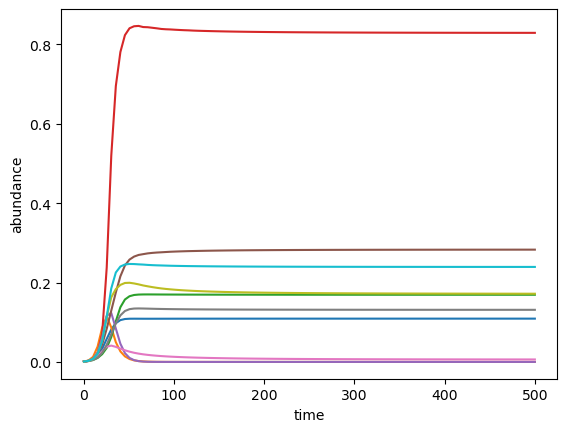

All real(eigenvalues) negative, system is stable


In [65]:
t_eval = np.linspace(0, 500, 100)
x0 = np.tile(.001, gLV_model_nocarb.n_species)
y = runODE(t_eval, x0, gLV_model_nocarb.params)
plt.plot(t_eval[:y.shape[0]], y)
plt.xlabel("time")
plt.ylabel("abundance")
plt.show()

r = gLV_model_nocarb.params[:gLV_model_nocarb.n_species]
A = np.reshape(gLV_model_nocarb.params[gLV_model_nocarb.n_species:], [gLV_model_nocarb.n_species, gLV_model_laminarin.n_species])
xf = y[-1, :]
J = Jacobian(xf, r, A, A@xf)
eigs = np.linalg.eigvals(J)

if np.all(eigs.real < 0):
    print("All real(eigenvalues) negative, system is stable")
else:
    print("System unstable")

# All params

In [66]:
df_params = pd.DataFrame({
    'Param name': df_Nocarb['Param name'],
    'Param value_Nocarb': df_Nocarb['Param value'],
    'Param value_Inulin': df_Inulin['Param value'],
    'Param value_Laminarin': df_Laminarin['Param value'],
    'Param value_Xylan': df_Xylan['Param value']
})
df_params

,Param name,Param value_Nocarb,Param value_Inulin,Param value_Laminarin,Param value_Xylan
0,PJ,0.189945,0.237690,0.188439,0.254899
1,BV,0.259485,0.459773,0.242321,0.368903
2,AC,0.158704,0.470608,0.207367,0.193125
3,DP,0.192311,0.192119,0.232801,0.245039
4,BT,0.217288,0.472563,0.188358,0.405058
...,...,...,...,...,...
105,EL*DL,0.024057,-0.067835,-0.011486,0.117464
106,EL*BH,0.358449,0.091178,-0.072055,0.333196
107,EL*BP,0.113633,0.008762,-0.235447,-0.179270
108,EL*CS,0.079912,0.062831,-0.066917,-0.112333


In [67]:
# Calculate median for each row
df_params['Median'] = df_params[['Param value_Nocarb', 'Param value_Inulin', 
                            'Param value_Laminarin', 'Param value_Xylan']].median(axis=1)

# Calculate standard deviation for each row
df_params['Std_dev'] = df_params[['Param value_Nocarb', 'Param value_Inulin', 
                            'Param value_Laminarin', 'Param value_Xylan']].std(axis=1)

df_params.to_csv('Parameters_summary.csv', index=False)